# **Entendimento dos Dados**

### **Coleta e Conversão dos dados**


Os dados coletados são de acesso público fornecidos pelo Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira (INEP) disponíveis em https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem no formato csv.

Como o arquivo CSV excedia o espaço disponível no repositório Git, os dados foram convertidos para o formato Parquet e armazenados no [Google Drive](https://drive.google.com/file/d/16QX0lsElysxH4GAIJqv6R4HOyzm-jEmT/view?usp=sharing). O Parquet oferece melhor compressão e desempenho, tornando o armazenamento e a manipulação de grandes volumes de dados mais eficientes.

In [19]:
import pandas as pd
import gdown

import matplotlib.pyplot as plt
import seaborn as sns

from chardet import detect

from warnings import filterwarnings

filterwarnings(action='ignore')

In [22]:
file_id = '16QX0lsElysxH4GAIJqv6R4HOyzm-jEmT'
url = f'https://drive.google.com/uc?id={file_id}'
output = '../data/raw/MICRODADOS_ENEM_2023.parquet'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=16QX0lsElysxH4GAIJqv6R4HOyzm-jEmT
From (redirected): https://drive.google.com/uc?id=16QX0lsElysxH4GAIJqv6R4HOyzm-jEmT&confirm=t&uuid=26b9390b-f795-4211-9f77-e9a35f0bd11a
To: c:\Users\Fábio\Documents\Projetos\My Projects\analytics-enem\analytics-enem-2023\data\raw\MICRODADOS_ENEM_2023.parquet
100%|██████████| 407M/407M [00:10<00:00, 38.8MB/s] 


'../data/raw/MICRODADOS_ENEM_2023.parquet'

In [18]:
with open('../data/raw/MICRODADOS_ENEM_2023.csv', 'rb') as file:
    result = detect(file.read(10000)) 
     
encoding = result['encoding']

enem_data = pd.read_csv(
    filepath_or_buffer='../data/raw/MICRODADOS_ENEM_2023.csv',
    sep=';',
    encoding=encoding
)

enem_data.to_parquet(
    path='../data/raw/MICRODADOS_ENEM_2023.parquet',
    engine='pyarrow',
    compression='snappy',
    index=False
)


### **Descrição dos dados**

Os dados coletados correspondem ao ano de 2023 abrangendo todos os estados. 
As seguintes colunas foram consideradas para a análise:

| Variável | Descrição |
| -------- | ----------- |
|TP_FAIXA_ETARIA|Faixa etária
|TP_SEXO|Sexo
|TP_COR_RACA|Cor/raça|
|TP_ESCOLA|Tipo de escola do ensino médio|
|IN_TREINEIRO|Indica se o inscrito fez a prova no intuito de treinar seus conhecimentos|
|TP_DEPENDENCIA_ADM_ESC|Dependência administrativa da escola|
|NO_MUNICIPIO_ESC|Nome do município da escola| 
|SG_UF_ESC|Sigla da Unidade Federativa da escola| 
|NO_MUNICIPIO_PROVA|Nome do município da aplicação da prova| 
|SG_UF_PROVA|Sigla da Unidade Federativa da aplicação da prova| 
|TP_PRESENCA_CN|Presença na prova objetiva de Ciências da Natureza|
|TP_PRESENCA_CH|Presença na prova objetiva de Ciências Humanas|
|TP_PRESENCA_LC|Presença na prova objetiva de Linguagens e Códigos|
|TP_PRESENCA_MT|Presença na prova objetiva de Matemática|
|NU_NOTA_CN|Nota na prova objetiva de Ciências da Natureza|
|NU_NOTA_CH|Nota na prova objetiva de Ciências Humanas|
|NU_NOTA_LC|Nota na prova objetiva de Linguagens e Códigos|
|NU_NOTA_MT|Nota na prova objetiva de Matemática|
|TP_STATUS_REDACAO|Situação da redação do participante|
|NU_NOTA_REDACAO|Nota na Redação|

Nem todas as colunas foram utilizadas para a análise, para maiores detalhes consultar o dicionário de dados na seção: **docs/Dicionário_Microdados_Enem_2023.ods**

### **Análise Exploratória dos dados**

In [23]:
cols = [
    'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_COR_RACA', 'TP_ESCOLA', 'IN_TREINEIRO',
    'NO_MUNICIPIO_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 
    'NO_MUNICIPIO_PROVA', 'SG_UF_PROVA',
    'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
    'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO'
]

enem_data = pd.read_parquet(
    path='../data/raw/MICRODADOS_ENEM_2023.parquet',
    columns=cols,
    engine='pyarrow'
)

enem_data.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,IN_TREINEIRO,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO
0,14,M,1,1,0,None,None,NaN,Bras�lia,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,12,M,1,1,0,None,None,NaN,Bras�lia,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,6,F,1,1,0,None,None,NaN,Caxias do Sul,RS,1,1,1,1,502.0,498.9,475.6,363.2,1.0,700.0
3,2,F,3,2,0,Fortaleza,CE,2.0,Fortaleza,CE,1,1,1,1,459.0,508.5,507.2,466.7,1.0,880.0
4,3,F,3,2,0,Quixad�,CE,2.0,Quixad�,CE,1,1,1,1,402.5,379.2,446.9,338.3,1.0,560.0


In [6]:
enem_data.shape

(3613424, 20)

In [7]:
enem_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3613424 entries, 0 to 3613423
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   TP_FAIXA_ETARIA         int64  
 1   TP_SEXO                 object 
 2   TP_COR_RACA             int64  
 3   TP_ESCOLA               int64  
 4   IN_TREINEIRO            int64  
 5   NO_MUNICIPIO_ESC        object 
 6   SG_UF_ESC               object 
 7   TP_DEPENDENCIA_ADM_ESC  float64
 8   NO_MUNICIPIO_PROVA      object 
 9   SG_UF_PROVA             object 
 10  TP_PRESENCA_CN          int64  
 11  TP_PRESENCA_CH          int64  
 12  TP_PRESENCA_LC          int64  
 13  TP_PRESENCA_MT          int64  
 14  NU_NOTA_CN              float64
 15  NU_NOTA_CH              float64
 16  NU_NOTA_LC              float64
 17  NU_NOTA_MT              float64
 18  TP_STATUS_REDACAO       float64
 19  NU_NOTA_REDACAO         float64
dtypes: float64(7), int64(8), object(5)
memory usage: 551.4+ MB


In [8]:
enem_data.nunique()

TP_FAIXA_ETARIA             20
TP_SEXO                      2
TP_COR_RACA                  6
TP_ESCOLA                    3
IN_TREINEIRO                 2
NO_MUNICIPIO_ESC          5237
SG_UF_ESC                   27
TP_DEPENDENCIA_ADM_ESC       4
NO_MUNICIPIO_PROVA        1715
SG_UF_PROVA                 27
TP_PRESENCA_CN               3
TP_PRESENCA_CH               3
TP_PRESENCA_LC               3
TP_PRESENCA_MT               3
NU_NOTA_CN                5037
NU_NOTA_CH                4809
NU_NOTA_LC                4754
NU_NOTA_MT                6053
TP_STATUS_REDACAO            8
NU_NOTA_REDACAO             50
dtype: int64

In [9]:
enem_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TP_FAIXA_ETARIA,3613424.0,5.021599,3.811260,1.0,2.0,3.0,7.0,20.0
TP_COR_RACA,3613424.0,2.061290,1.002588,0.0,1.0,2.0,3.0,5.0
TP_ESCOLA,3613424.0,1.429241,0.608372,1.0,1.0,1.0,2.0,3.0
IN_TREINEIRO,3613424.0,0.153619,0.360583,0.0,0.0,0.0,0.0,1.0
TP_DEPENDENCIA_ADM_ESC,903825.0,2.447562,0.915068,1.0,2.0,2.0,3.0,4.0
TP_PRESENCA_CN,3613424.0,0.698697,0.460033,0.0,0.0,1.0,1.0,2.0
TP_PRESENCA_CH,3613424.0,0.732276,0.445393,0.0,0.0,1.0,1.0,2.0
TP_PRESENCA_LC,3613424.0,0.732276,0.445393,0.0,0.0,1.0,1.0,2.0
TP_PRESENCA_MT,3613424.0,0.698697,0.460033,0.0,0.0,1.0,1.0,2.0
NU_NOTA_CN,2520675.0,496.151137,87.836966,0.0,440.6,493.9,551.4,868.4


### **Respondendo as Questões de Negócio**

#### **Perfil Etário**

##### Qual é a faixa etária predominante entre os inscritos?

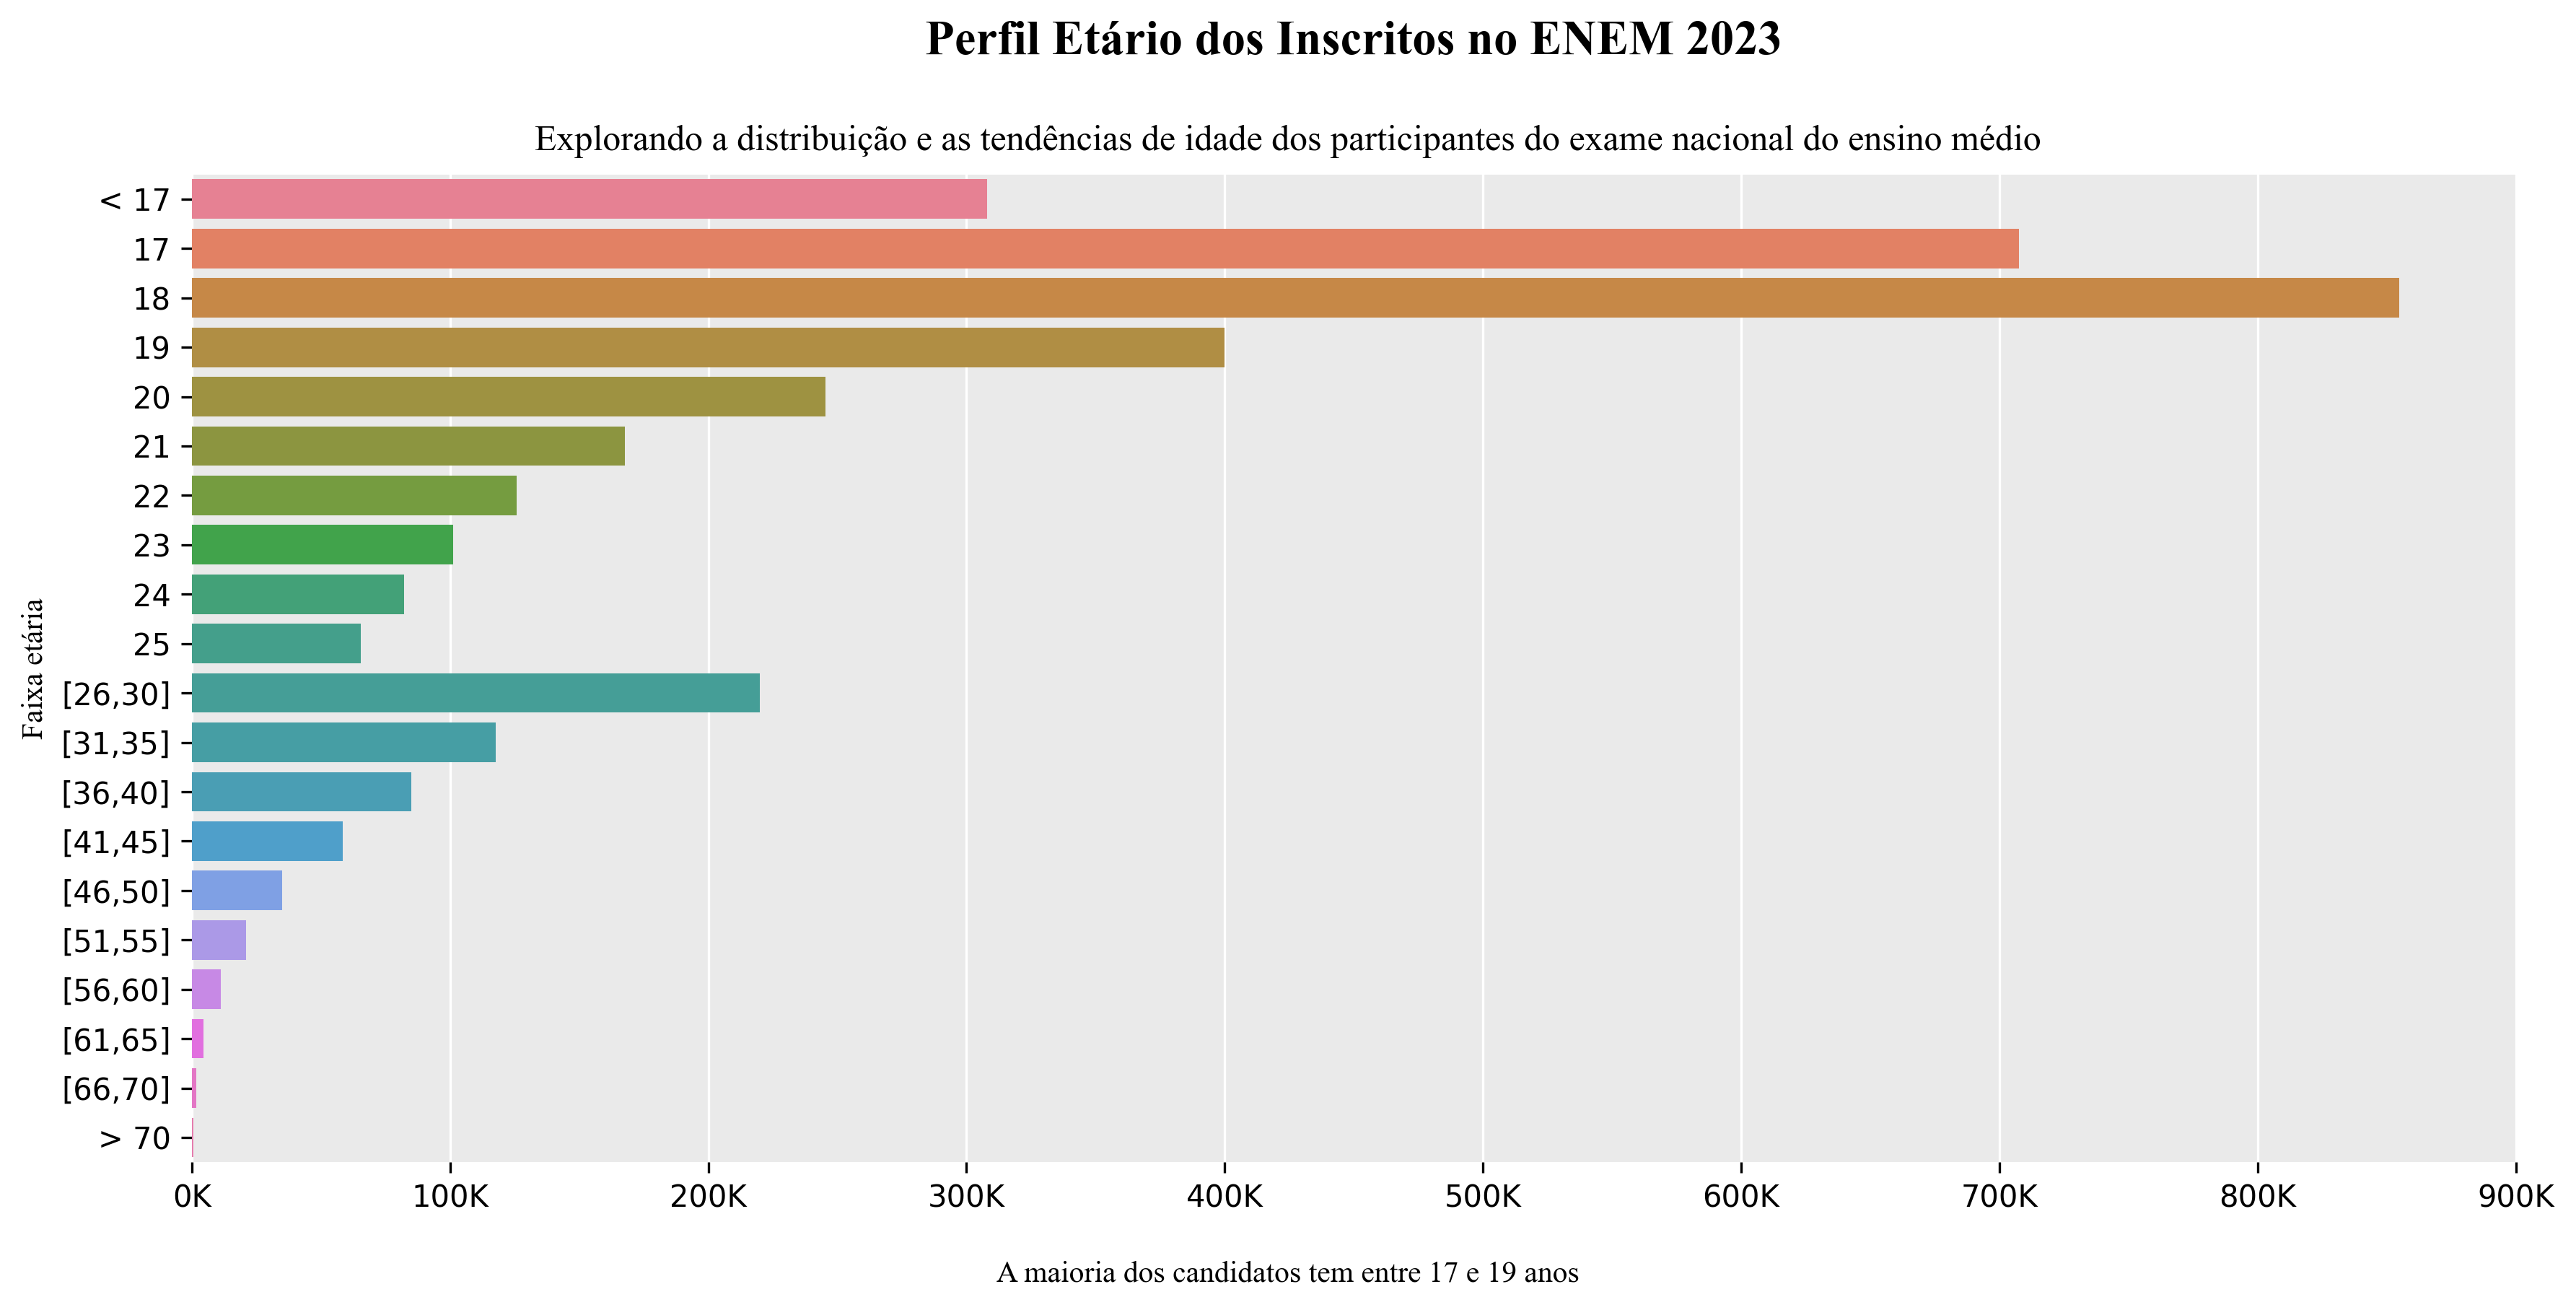

In [10]:
palette = ['cornflowerblue', 'firebrick', 'darkorange', 'cadetblue', 'mediumpurple', 'gray', 'lightcoral']

faixa_etaria_ranking = enem_data.TP_FAIXA_ETARIA.value_counts().sort_index()

faixa_etaria_labels = [
    '< 17', '17', '18', '19', '20',
    '21', '22', '23', '24', '25',
    '[26,30]', '[31,35]', '[36,40]', '[41,45]', '[46,50]',
    '[51,55]', '[56,60]', '[61,65]', '[66,70]', '> 70'
]

plt.figure(figsize=(12, 6), dpi=300)

ax = sns.barplot(
    x=faixa_etaria_ranking.values, 
    y=faixa_etaria_labels,
    orient='h', 
    hue=faixa_etaria_labels,
    linewidth=15  
)

x_ticks = plt.gca().get_xticks()
thousand_x_ticks = [f'{x * 1e-3:.0f}K' for x in x_ticks]
ax.set_xticks(x_ticks)
ax.set_xticklabels(thousand_x_ticks)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.grid(visible=True, axis='x', color='white')
ax.grid(visible=False, axis='y')
ax.set_axisbelow(True)
ax.set_facecolor('#eaeaea')

plt.title(
    label='Perfil Etário dos Inscritos no ENEM 2023', 
    fontname='Times New Roman',
    fontweight='black',
    pad=40,
    size=16
)

plt.xlabel(xlabel=' ')
plt.ylabel(ylabel='Faixa etária', fontname='Times New Roman')

plt.figtext(
    x=0.5, 
    y=0.87,
    s="Explorando a distribuição e as tendências de idade dos participantes do exame nacional do ensino médio", 
    fontname='Times New Roman',
    ha="center",
    va="bottom",
    size=12
)

plt.figtext(
    x=0.5,
    y=0,
    s="A maioria dos candidatos tem entre 17 e 19 anos",
    fontname='Times New Roman',
    ha="center",
    va="bottom",
    size=10
)

plt.tight_layout()
plt.savefig('../reports/figures/perfil-etario-enem-2023.png', dpi=300, bbox_inches='tight')
plt.show()


#### **Perfil de Gênero**

##### Como se distribui a proporção de gênero entre os candidatos?

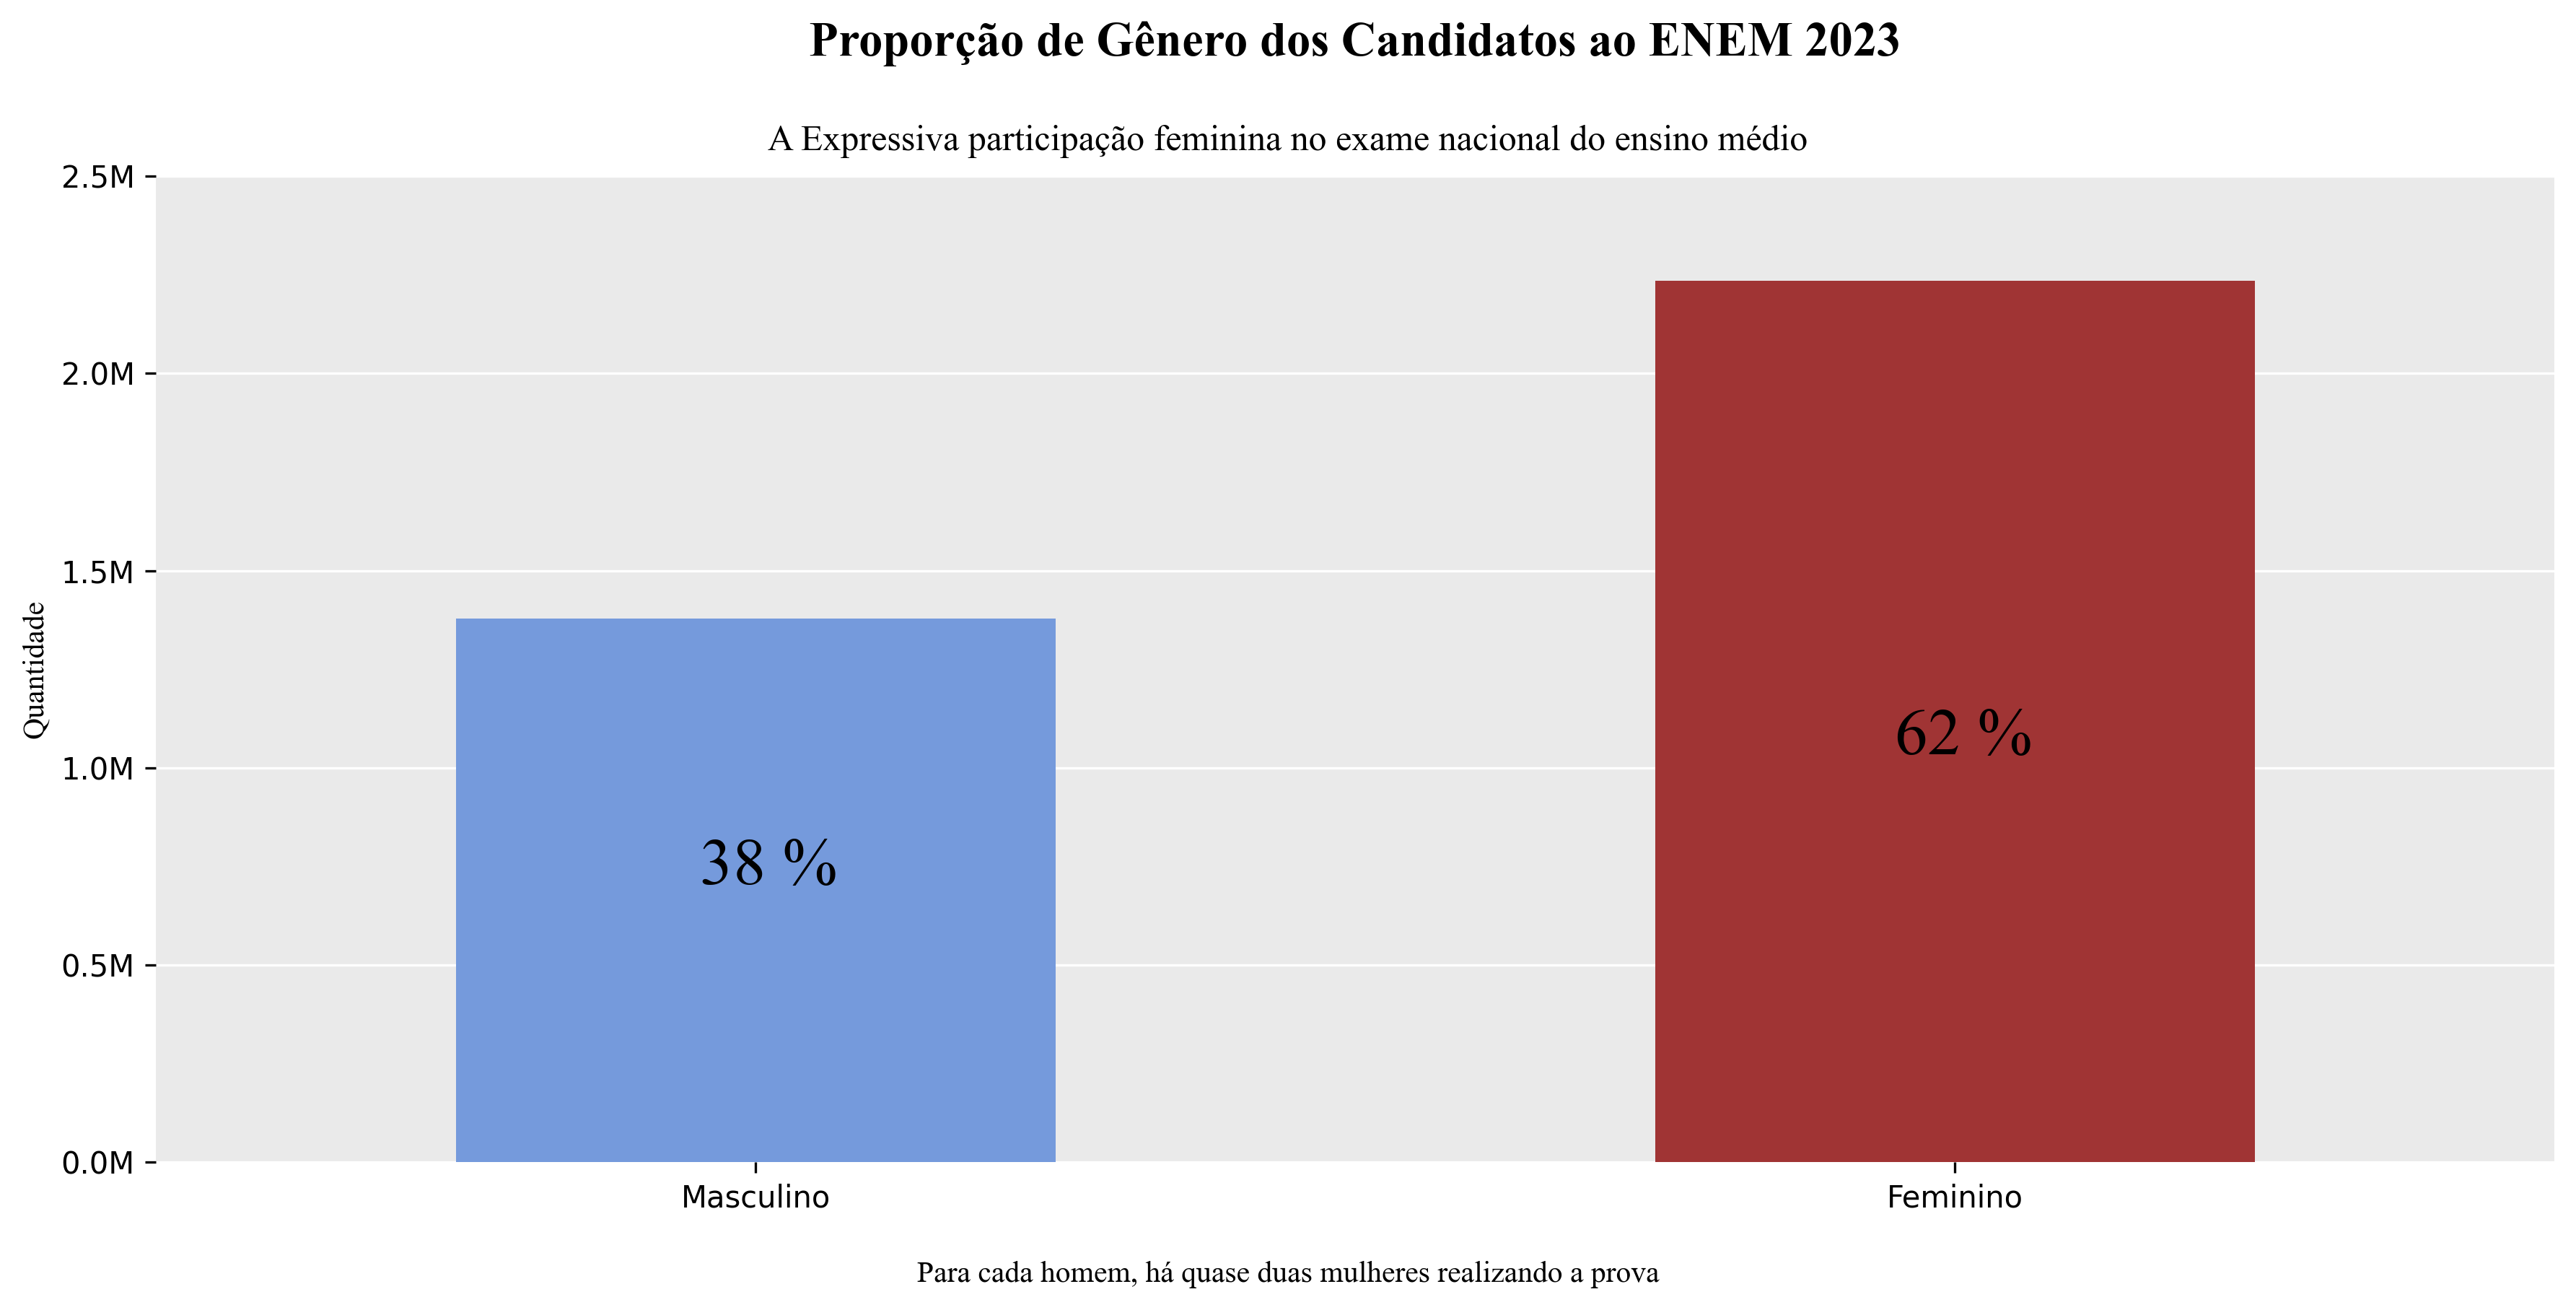

In [11]:
gender_counts = enem_data['TP_SEXO'].value_counts()
total = gender_counts.sum()
gender_proportions = (gender_counts / total).tolist()

plt.figure(figsize=(12, 6), dpi=300)

ax = sns.countplot(
    x=enem_data['TP_SEXO'],
    hue=enem_data['TP_SEXO'],
    legend=False,
    palette=['cornflowerblue', 'firebrick'],
    width=0.5
)

ax.set_xticks(['M', 'F'])
ax.set_xticklabels(['Masculino', 'Feminino'])

y_ticks = plt.gca().get_yticks()
million_y_ticks = [f'{y * 1e-6}M' for y in y_ticks]

ax.set_yticks(y_ticks)
ax.set_yticklabels(million_y_ticks)

plt.title(
    label='Proporção de Gênero dos Candidatos ao ENEM 2023',
    fontname='Times New Roman',
    fontweight='black',
    pad=40,
    size=16
)

plt.xlabel(' ')
plt.ylabel('Quantidade', fontname='Times New Roman')

plt.figtext(
    x=0.5, 
    y=0.87,
    s="A Expressiva participação feminina no exame nacional do ensino médio", 
    fontname='Times New Roman',
    ha="center",
    va="bottom",
    size=12
)

plt.figtext(
    x=0.3, 
    y=0.3,
    s="38 %", 
    fontname='Times New Roman',
    ha="center",
    va="bottom",
    size=22,
)

plt.figtext(
    x=0.76,
    y=0.4,
    s="62 %",
    fontname='Times New Roman',
    ha="center",
    va="bottom",
    size=22
)

plt.figtext(
    x=0.5, 
    y=0,
    s="Para cada homem, há quase duas mulheres realizando a prova", 
    fontname='Times New Roman',
    ha="center",
    va="bottom",
    size=10
)

for spine in ax.spines.values():
    spine.set_visible(False)
 

ax.grid(visible=False, axis='x') 
ax.grid(visible=True, axis='y', color='white')
ax.set_axisbelow(True)  
ax.set_facecolor('#eaeaea')

plt.tight_layout()
plt.savefig('../reports/figures/proporcao-de-genero-enem-2023.png', dpi=300, bbox_inches='tight')
plt.show()

#### **Desempenho dos Candidatos**

##### Como é a distribuição das notas dos candidatos por área de conhecimento?

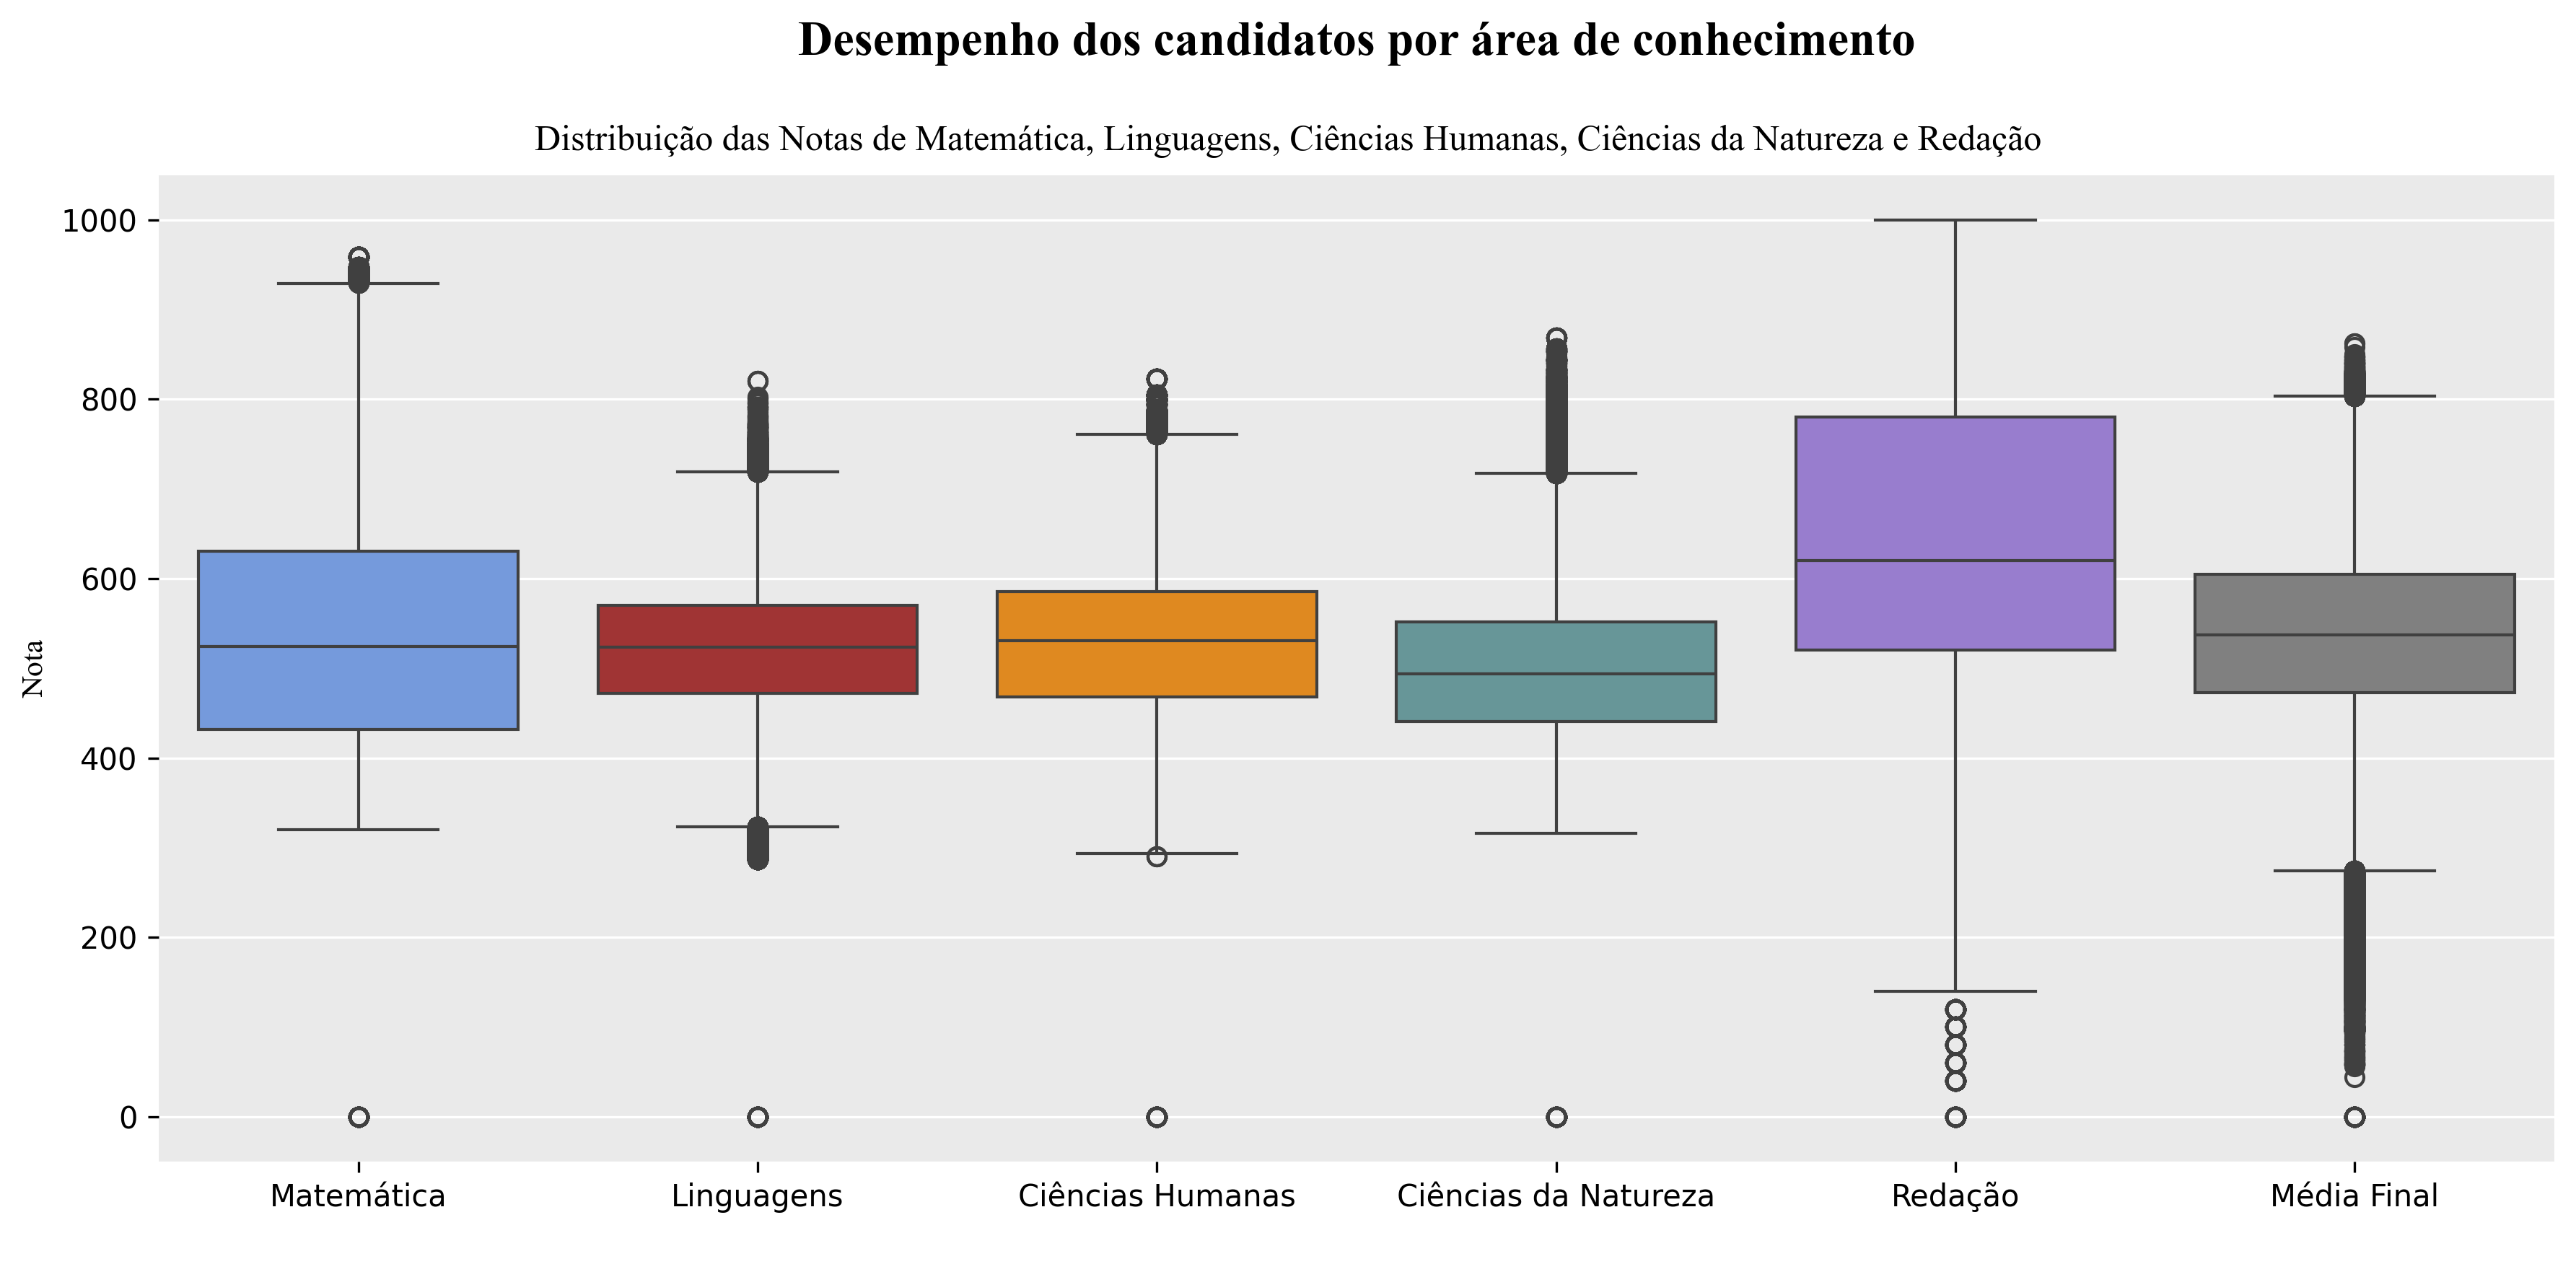

In [12]:
notas_provas = enem_data[['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']]
notas_provas = notas_provas.assign(NU_NOTA_FINAL=notas_provas.mean(axis=1))
provas_labels = ['Matemática', 'Linguagens', 'Ciências Humanas', 'Ciências da Natureza', 'Redação', 'Média Final']
notas_provas.columns = provas_labels

plt.figure(figsize=(12, 6), dpi=300)

ax = sns.boxplot(
    data=notas_provas,
    palette=palette
)

plt.title(
    label='Desempenho dos candidatos por área de conhecimento',
    fontname='Times New Roman',
    fontweight='black',
    pad=40,
    size=16
)

plt.xlabel(' ')
plt.ylabel('Nota', fontname='Times New Roman')

plt.figtext(
    x=0.5, 
    y=0.87,
    s="Distribuição das Notas de Matemática, Linguagens, Ciências Humanas, Ciências da Natureza e Redação", 
    fontname='Times New Roman',
    ha="center",
    va="bottom",
    size=12
)
           
for spine in ax.spines.values():
    spine.set_visible(False)

ax.grid(visible=False, axis='x') 
ax.grid(visible=True, axis='y', color='white')
ax.set_axisbelow(True)
ax.set_facecolor('#eaeaea')

plt.tight_layout()
plt.savefig('../reports/figures/distribuicao-notas-por-area-de-conhecimento-enem-2023.png', dpi=300, bbox_inches='tight')
plt.show()


##### Como as notas de redação se diferem entre alunos de escolas públicas e privadas?

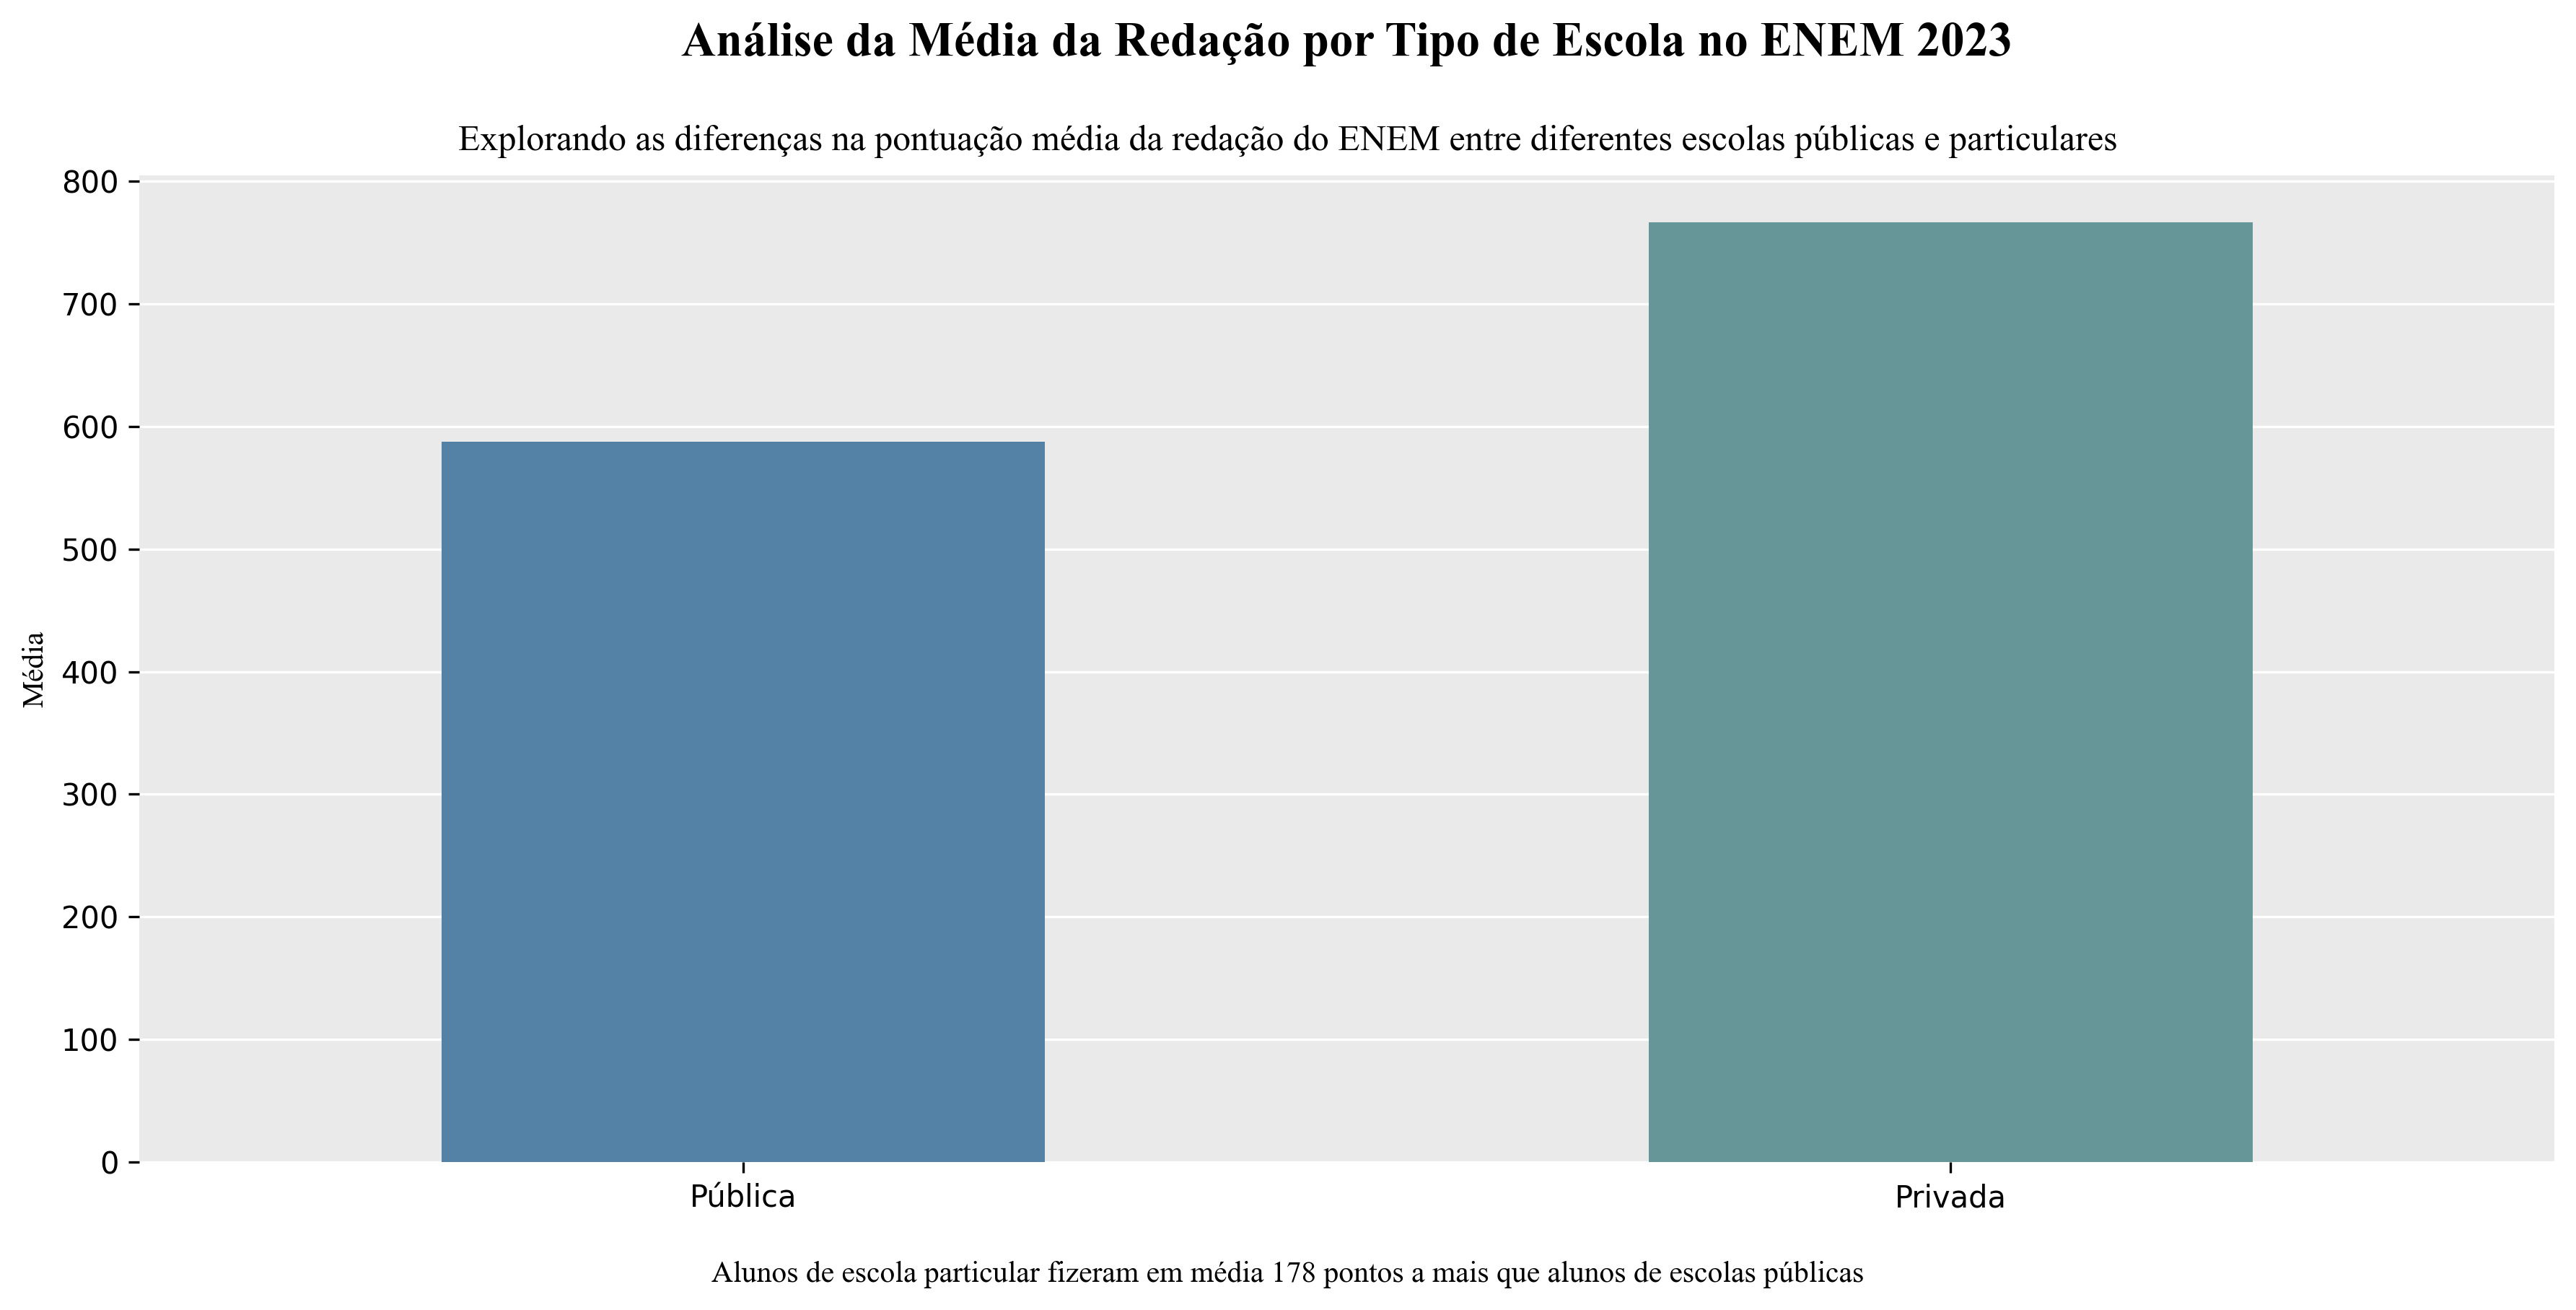

In [13]:
tp_escola = ['Pública','Privada']
query = enem_data['TP_ESCOLA'] != 1
grouped_by_escola = enem_data[query].filter(items=['TP_ESCOLA', 'NU_NOTA_REDACAO']).groupby('TP_ESCOLA')

plt.figure(figsize=(12, 6), dpi=300)

ax = sns.barplot(
    x=tp_escola,
    y=grouped_by_escola.mean().NU_NOTA_REDACAO,
    hue=grouped_by_escola.mean().NU_NOTA_REDACAO,
    legend = False,
    palette=['steelblue','cadetblue'],
    width=0.5
)

plt.title(
    label='Análise da Média da Redação por Tipo de Escola no ENEM 2023',
    fontname='Times New Roman',
    fontweight='black',
    pad=40,
    size=16
)

plt.xlabel(' ')
plt.ylabel('Média', fontname='Times New Roman')

plt.figtext(
    x=0.5, 
    y=0.87,
    s="Explorando as diferenças na pontuação média da redação do ENEM entre diferentes escolas públicas e particulares", 
    fontname='Times New Roman',
    ha="center",
    va="bottom",
    size=12
)

plt.figtext(
    x=0.5, 
    y=0,
    s="Alunos de escola particular fizeram em média 178 pontos a mais que alunos de escolas públicas", 
    fontname='Times New Roman',
    ha="center",
    va="bottom",
    size=10
)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.grid(visible=False, axis='x') 
ax.grid(visible=True, axis='y', color='white')
ax.set_axisbelow(True)
ax.set_facecolor('#eaeaea')

plt.tight_layout()
plt.savefig('../reports/figures/comparacao-media-redacao-por-tipo-de-escola-enem-2023.png', dpi=300, bbox_inches='tight')
plt.show()

##### Quais são os principais fatores que levam os candidatos a obterem nota zero na redação?

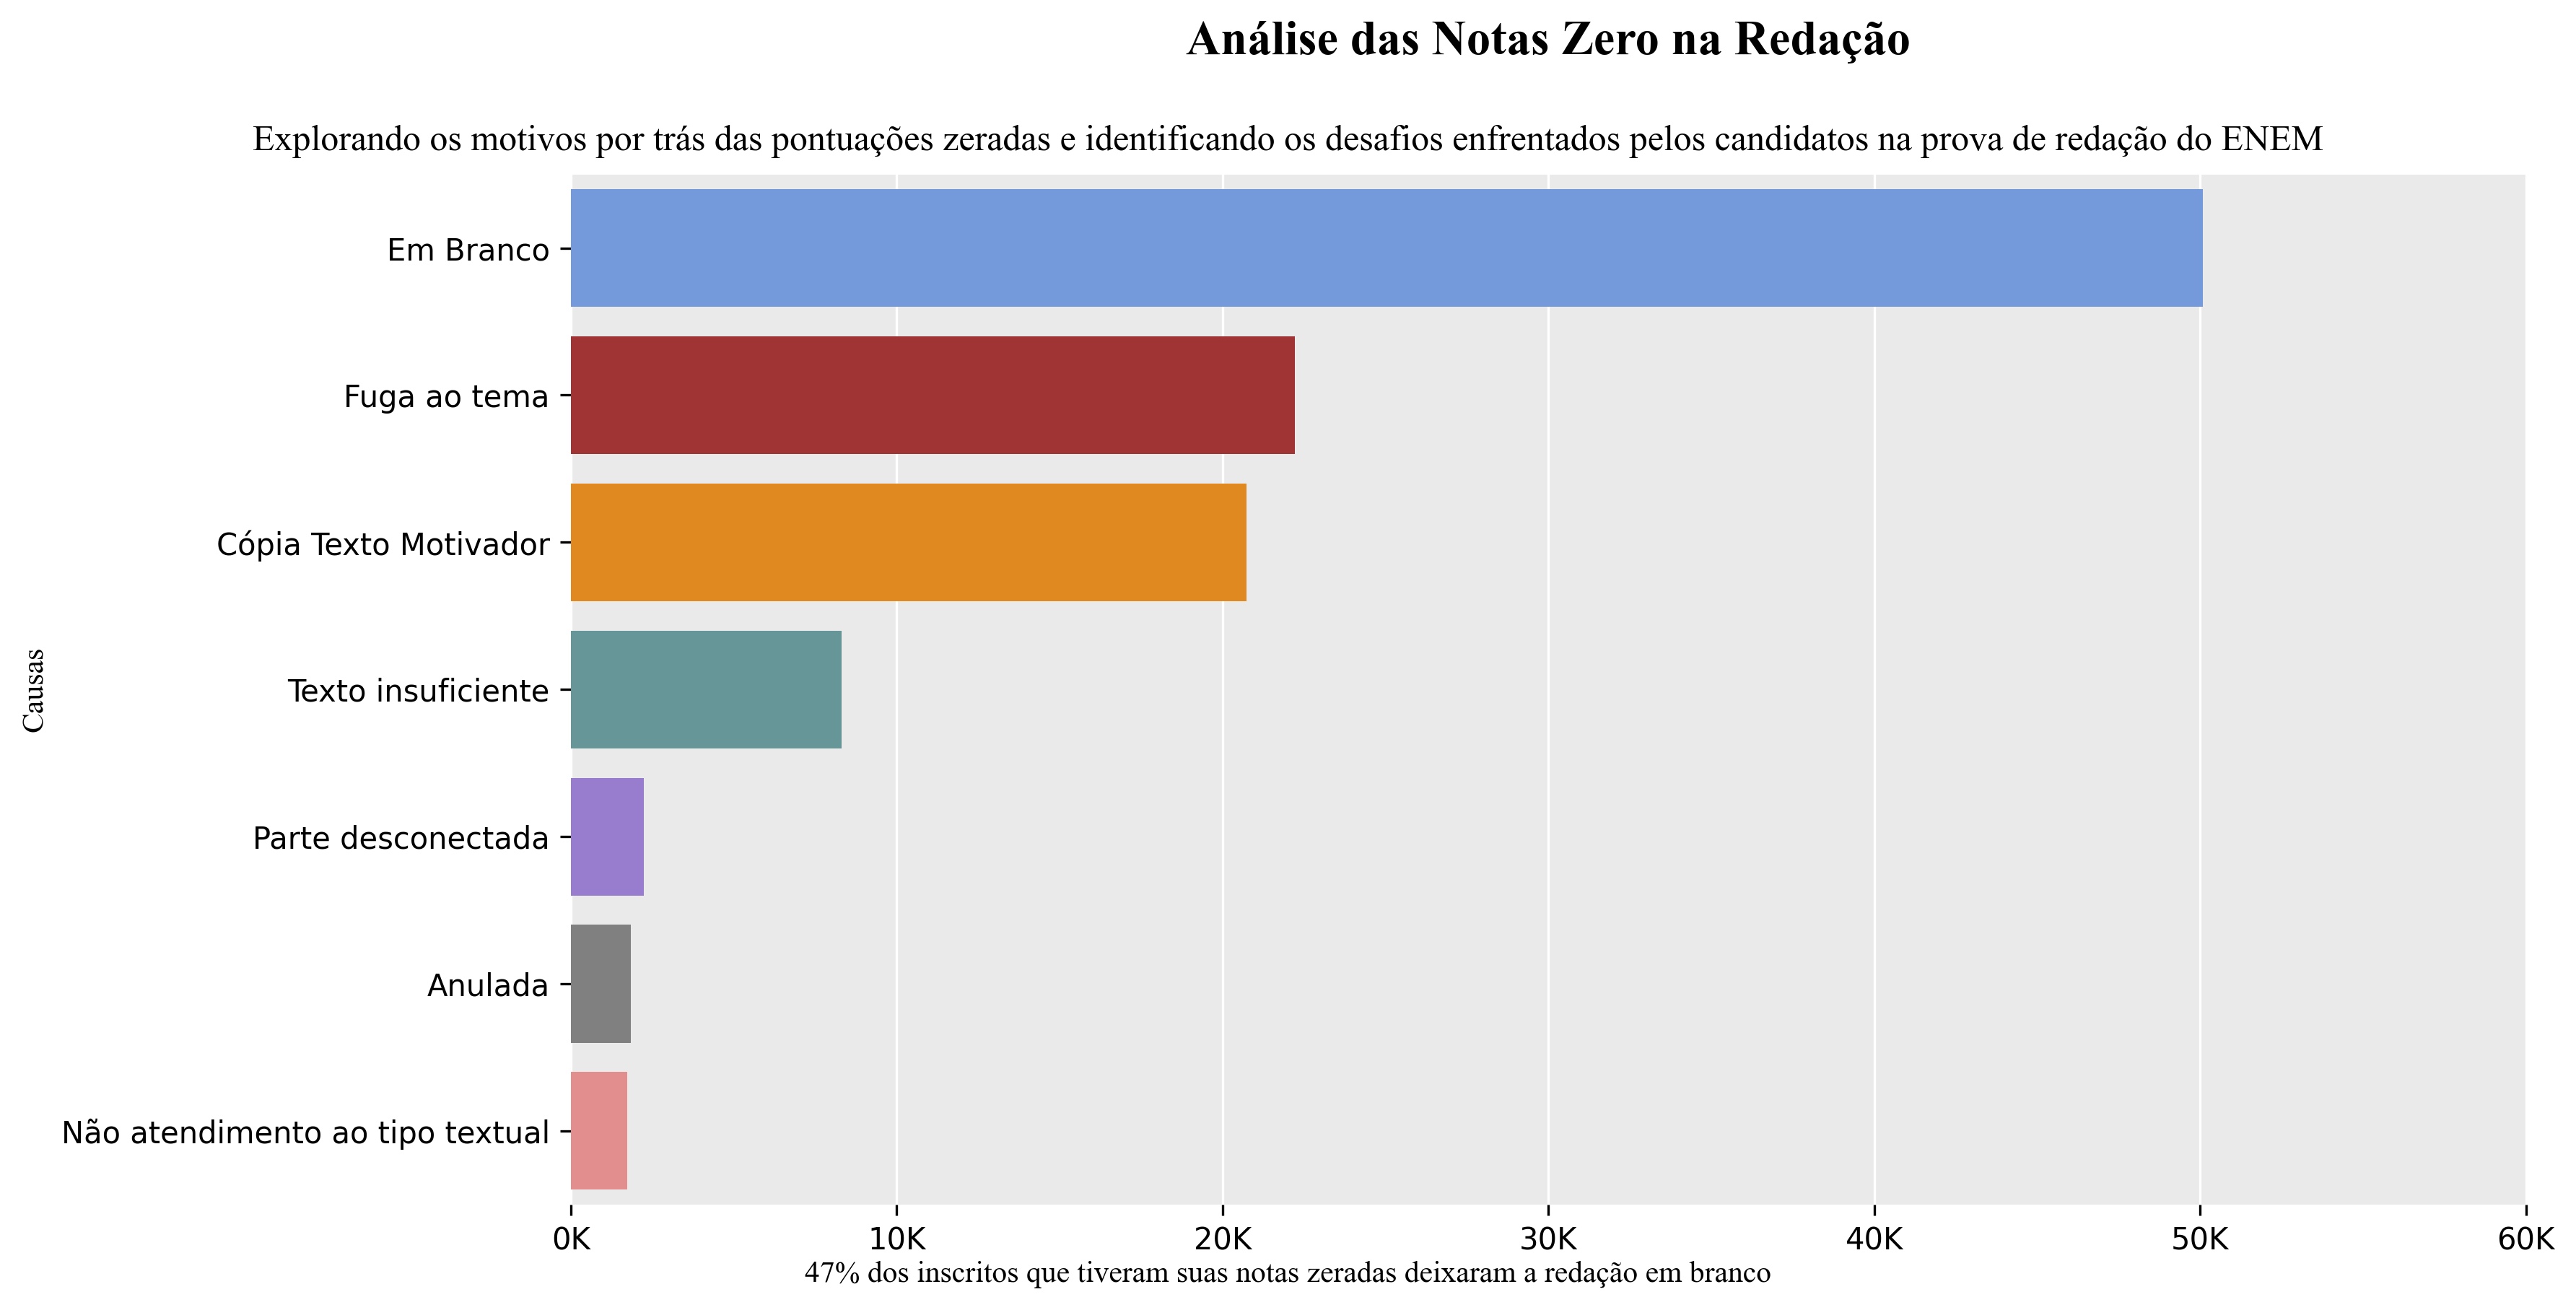

In [14]:
query = enem_data['TP_STATUS_REDACAO'] != 1.0

redacao_nota_0 = enem_data[query]

redacao_nota_0_status = redacao_nota_0['TP_STATUS_REDACAO'].value_counts()

redacao_nota_0_status_label = {
    2: 'Anulada',
    3: 'Cópia Texto Motivador',
    4: 'Em Branco',
    6: 'Fuga ao tema',
    7: 'Não atendimento ao tipo textual',
    8: 'Texto insuficiente',
    9: 'Parte desconectada'
}

plt.figure(figsize=(12, 6), dpi=300)

ax = sns.barplot(
    x=redacao_nota_0_status.values, 
    y=[redacao_nota_0_status_label[x] for x in redacao_nota_0_status.index],
    hue=[redacao_nota_0_status_label[x] for x in redacao_nota_0_status.index],
    orient='h', 
    linewidth=15,
    legend=False,
    palette=palette
)

x_ticks = plt.gca().get_xticks()
thousand_x_ticks = [f'{x * 1e-3:.0f}K' for x in x_ticks]
ax.set_xticks(x_ticks)
ax.set_xticklabels(thousand_x_ticks)

plt.title(
    label='Análise das Notas Zero na Redação', 
    fontname='Times New Roman',
    fontweight='black',
    pad=40,
    size=16
)

plt.ylabel(ylabel='Causas', fontname='Times New Roman')
plt.xlabel(xlabel='')

plt.figtext(
    x=0.5, 
    y=0.87,
    s="Explorando os motivos por trás das pontuações zeradas e identificando os desafios enfrentados pelos candidatos na prova de redação do ENEM", 
    fontname='Times New Roman',
    ha="center",
    va="bottom",
    size=12
)

redacao_branco = redacao_nota_0_status.tolist()[0] / redacao_nota_0_status.sum() * 100

plt.figtext(
    x=0.5,
    y=0,
    s=f"{redacao_branco:.0f}% dos inscritos que tiveram suas notas zeradas deixaram a redação em branco",
    fontname='Times New Roman',
    ha="center",
    va="bottom",
    size=10
)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.grid(visible=True, axis='x', color='white')
ax.grid(visible=False, axis='y')
ax.set_axisbelow(True)
ax.set_facecolor('#eaeaea')

plt.tight_layout()
plt.savefig('../reports/figures/motivos-notas-zero-redacao-enem-2023.png', dpi=300, bbox_inches='tight')
plt.show()


##### Qual é a proporção de treineiros em comparação com candidatos regulares?

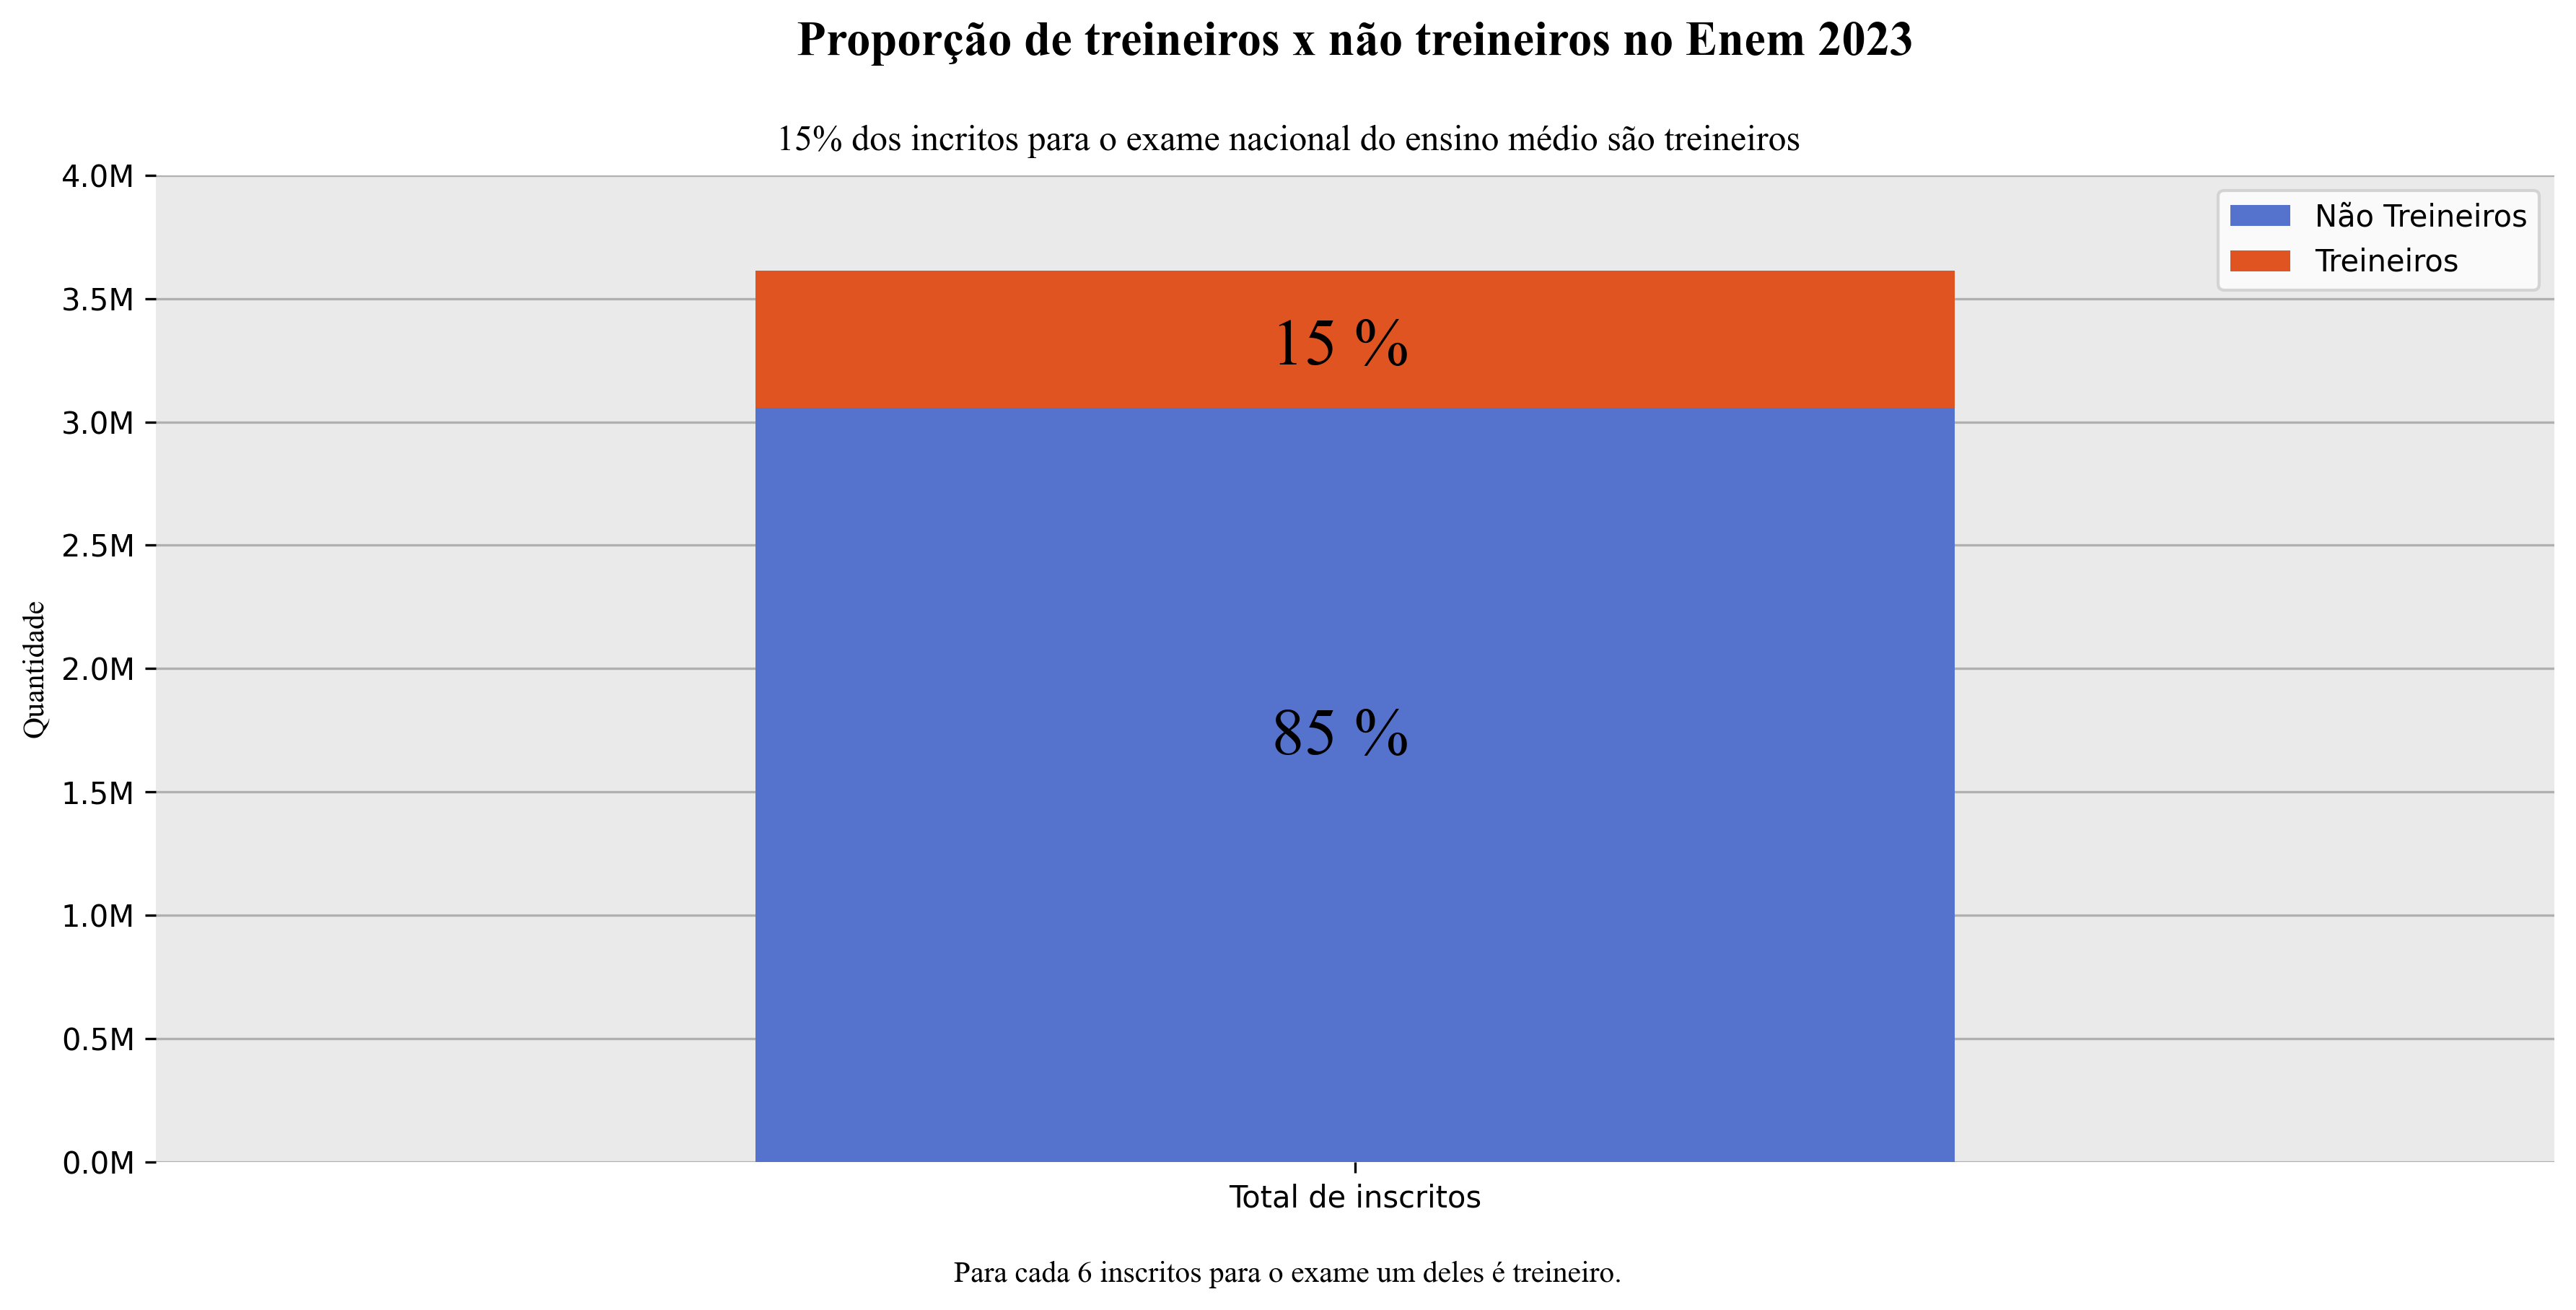

In [15]:
query = enem_data['IN_TREINEIRO'] == 1
proporcao_treineiro = enem_data[query].shape[0] / enem_data.shape[0] * 100
proporcao_treineiro

label = [['Não Treineiro'], ['Treineiro']]
quantidade = enem_data['IN_TREINEIRO'].value_counts().values

data = {
    'Categoria': ['Total de inscritos'],
    'Não Treineiros': [quantidade[0]],
    'Treineiros': [quantidade[1]]
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 6), dpi=300)

bar1 = sns.barplot(x='Categoria', y='Não Treineiros', data=df, label='Não Treineiros', width=0.5, color='royalblue', legend=True)
bar2 = sns.barplot(x='Categoria', y='Treineiros', data=df, bottom=df['Não Treineiros'], label='Treineiros', width=0.5, color='orangered')

plt.title(
    label='Proporção de treineiros x não treineiros no Enem 2023',
    fontname='Times New Roman',
    fontweight='black',
    pad=40,
    size=16
)

y_ticks = plt.gca().get_yticks()
million_y_ticks = [f'{y * 1e-6}M' for y in y_ticks]

plt.figtext(
    x=0.5, 
    y=0.87,
    s=f"{proporcao_treineiro:.0f}% dos incritos para o exame nacional do ensino médio são treineiros", 
    fontname='Times New Roman',
    ha="center",
    va="bottom",
    size=12
)

plt.figtext(
    x=0.52, 
    y=0.7,
    s="15 %", 
    fontname='Times New Roman',
    ha="center",
    va="bottom",
    size=22,
)

plt.figtext(
    x=0.52,
    y=0.4,
    s="85 %",
    fontname='Times New Roman',
    ha="center",
    va="bottom",
    size=22
)

plt.figtext(
    x=0.5, 
    y=0,
    s="Para cada 6 inscritos para o exame um deles é treineiro.", 
    fontname='Times New Roman',
    ha="center",
    va="bottom",
    size=10
)

bar1.set_yticks(y_ticks)
bar1.set_yticklabels(million_y_ticks)

plt.ylabel(ylabel='Quantidade', fontname='Times New Roman')
plt.xlabel(xlabel=' ')

for spine in bar1.spines.values():
    spine.set_visible(False)

bar1.grid(visible=False, axis='x')
bar1.grid(visible=True, axis='y')
bar1.set_axisbelow(True)
bar1.set_facecolor('#eaeaea')


plt.tight_layout()
plt.savefig('../reports/figures/proporcao_treineiro-vs-nao-treineiros-enem-2023.png', dpi=300, bbox_inches='tight')
plt.show()
